<a href="https://colab.research.google.com/github/VictoriousVK/PredictionApp/blob/main/Copie_de_Credit_App_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

# **Librairies **

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle


# **Collecte de donnees **

In [4]:
# Chargement du fichier CSV dans un DataFrame
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# **Nettoyage de donnees **

In [5]:
# Afficher des informations sur le DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# Compter le nombre de valeurs manquantes dans chaque colonne et les trier par ordre décroissant
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# Convertir la colonne Credit_History en type de données objet
df['Credit_History'] = df['Credit_History'].astype('object')

# Vérifier le type de données de la colonne Credit_History après conversion
print(df['Credit_History'].dtype)


object


In [8]:
# Liste des colonnes avec des valeurs manquantes
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount', 'Dependents', 'Loan_Amount_Term', 'Gender', 'Married']

# Boucle d'imputation
for col in null_cols:
    if df[col].dtype == 'object':
        # Imputer les variables catégorielles avec le mode
        valeur_mode = df[col].mode()[0]
        df[col].fillna(valeur_mode, inplace=True)
        print(f"Imputation de {col} avec le mode : {valeur_mode}")
    else:
        # Imputer les variables numériques avec la moyenne pour les non binaires et le mode pour les binaires
        valeur_moyenne = df[col].mean()
        df[col].fillna(valeur_moyenne, inplace=True)
        print(f"Imputation de {col} avec la moyenne : {valeur_moyenne}")


Imputation de Credit_History avec le mode : 1.0
Imputation de Self_Employed avec le mode : No
Imputation de LoanAmount avec la moyenne : 146.41216216216216
Imputation de Dependents avec le mode : 0
Imputation de Loan_Amount_Term avec la moyenne : 342.0
Imputation de Gender avec le mode : Male
Imputation de Married avec le mode : Yes


In [9]:
df.isnull().sum().sort_values(ascending=False)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
# Afficher un résumé statistique des colonnes numériques du DataFrame
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [11]:
# Initialisation des listes pour stocker les données catégorielles et numériques
cat_data = []  # Liste pour les données catégorielles
num_data = []  # Liste pour les données numériques

# Parcours des types de données de chaque colonne dans le DataFrame
for i, c in enumerate(df.dtypes):
    # Vérification si le type de données de la colonne est un objet (catégorique)
    if c == object:
        # Ajout de la colonne à la liste des données catégorielles
        cat_data.append(df.iloc[:, i])
    else:
        # Ajout de la colonne à la liste des données numériques
        num_data.append(df.iloc[:, i])

# Affichage des données catégorielles
cat_data


[0      LP001002
 1      LP001003
 2      LP001005
 3      LP001006
 4      LP001008
          ...   
 609    LP002978
 610    LP002979
 611    LP002983
 612    LP002984
 613    LP002990
 Name: Loan_ID, Length: 614, dtype: object,
 0        Male
 1        Male
 2        Male
 3        Male
 4        Male
         ...  
 609    Female
 610      Male
 611      Male
 612      Male
 613    Female
 Name: Gender, Length: 614, dtype: object,
 0       No
 1      Yes
 2      Yes
 3      Yes
 4       No
       ... 
 609     No
 610    Yes
 611    Yes
 612    Yes
 613     No
 Name: Married, Length: 614, dtype: object,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 609     0
 610    3+
 611     1
 612     2
 613     0
 Name: Dependents, Length: 614, dtype: object,
 0          Graduate
 1          Graduate
 2          Graduate
 3      Not Graduate
 4          Graduate
            ...     
 609        Graduate
 610        Graduate
 611        Graduate
 612        Graduate
 613   

In [12]:
# Création d'un DataFrame à partir des données catégorielles collectées précédemment
cat_data=pd.DataFrame(cat_data).transpose()

In [13]:
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [14]:
# Création d'un DataFrame à partir des données numériques collectées précédemment
num_data=pd.DataFrame(num_data).transpose()
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,146.412162,360.0,1.0
1,4583.0,1508.0,128.000000,360.0,1.0
2,3000.0,0.0,66.000000,360.0,1.0
3,2583.0,2358.0,120.000000,360.0,1.0
4,6000.0,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.000000,360.0,1.0
610,4106.0,0.0,40.000000,180.0,1.0
611,8072.0,240.0,253.000000,360.0,1.0
612,7583.0,0.0,187.000000,360.0,1.0


In [15]:
# Remplacer les valeurs manquantes dans les données catégorielles par le mode de chaque colonne
cat_data=cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))

cat_data.isnull().sum().any()

False

In [16]:
num_data.fillna(method='bfill',inplace=True)
num_data.isnull().sum().any()

False

In [17]:
target_values={'Y':1,'N':0}
target=cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1,inplace=True)
target=target.map(target_values)
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [18]:
le= LabelEncoder()
for i in cat_data:
    cat_data[i]=le.fit_transform(cat_data[i])
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [19]:
cat_data.drop('Loan_ID',axis=1, inplace=True)


In [20]:
x= pd.concat([cat_data,num_data],axis=1)
y=target

In [21]:
x

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,5849.0,0.0,146.412162,360.0,1.0
1,1,1,1,0,0,0,4583.0,1508.0,128.000000,360.0,1.0
2,1,1,0,0,1,2,3000.0,0.0,66.000000,360.0,1.0
3,1,1,0,1,0,2,2583.0,2358.0,120.000000,360.0,1.0
4,1,0,0,0,0,2,6000.0,0.0,141.000000,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,2900.0,0.0,71.000000,360.0,1.0
610,1,1,3,0,0,0,4106.0,0.0,40.000000,180.0,1.0
611,1,1,1,0,0,2,8072.0,240.0,253.000000,360.0,1.0
612,1,1,2,0,0,2,7583.0,0.0,187.000000,360.0,1.0


In [22]:
target.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [23]:
df=pd.concat([cat_data,num_data,target],axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,2,5849.0,0.0,146.412162,360.0,1.0,1
1,1,1,1,0,0,0,4583.0,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,2,3000.0,0.0,66.000000,360.0,1.0,1
3,1,1,0,1,0,2,2583.0,2358.0,120.000000,360.0,1.0,1
4,1,0,0,0,0,2,6000.0,0.0,141.000000,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,2900.0,0.0,71.000000,360.0,1.0,1
610,1,1,3,0,0,0,4106.0,0.0,40.000000,180.0,1.0,1
611,1,1,1,0,0,2,8072.0,240.0,253.000000,360.0,1.0,1
612,1,1,2,0,0,2,7583.0,0.0,187.000000,360.0,1.0,1


# **Analyse Exploratoire **

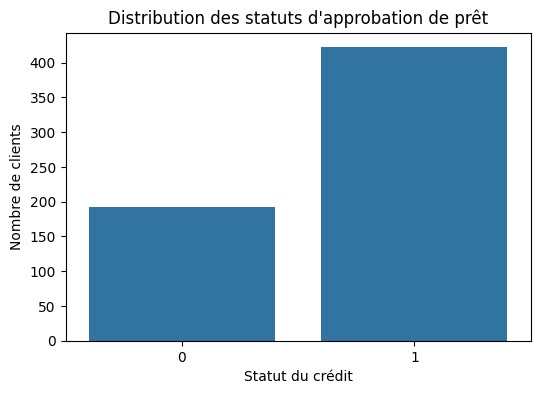

In [24]:
# Définition de la taille de la figure
plt.figure(figsize=(6, 4))


# Création d'un graphique à barres pour visualiser la distribution de la variable cible
sns.countplot(x='Loan_Status', data=df)

# Ajout du titre au graphique
plt.title('Distribution des statuts d\'approbation de prêt')

# Étiquetage des axes
plt.xlabel('Statut du crédit')
plt.ylabel('Nombre de clients')


# Affichage du graphique
plt.show()

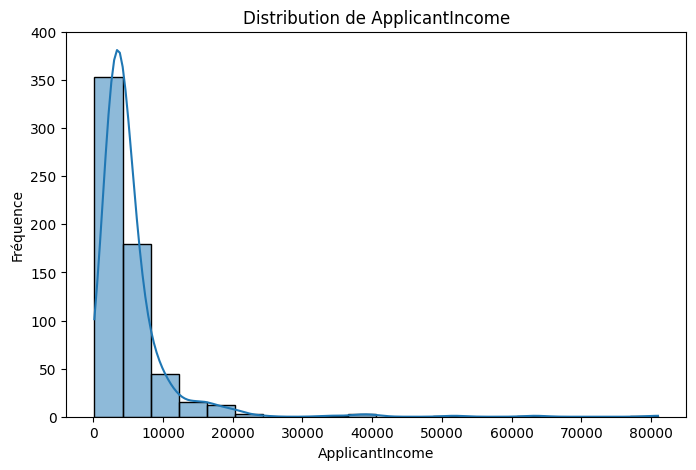

<ipython-input-25-933e36c17657>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=i, data=df, palette='Set3')


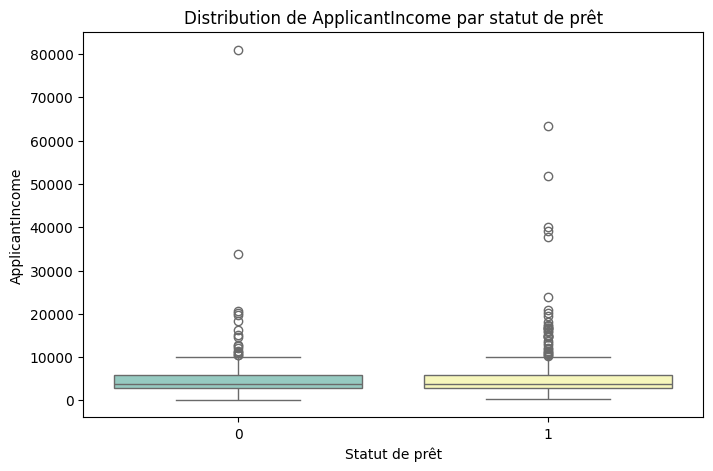

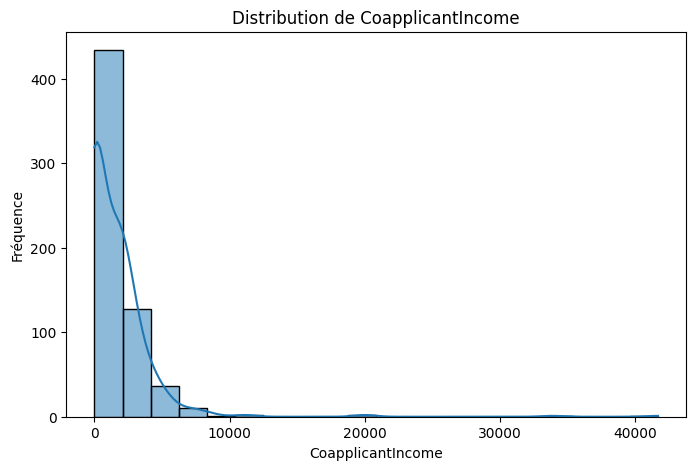

<ipython-input-25-933e36c17657>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=i, data=df, palette='Set3')


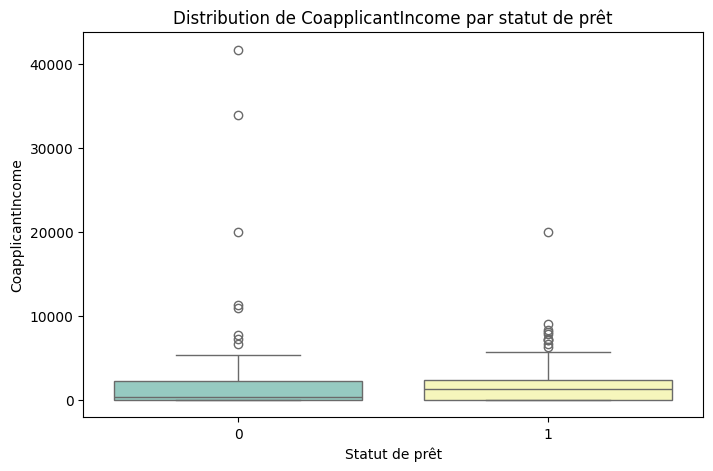

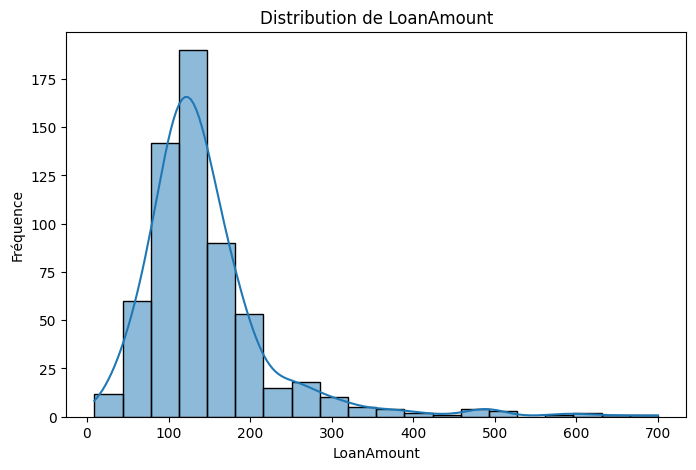

<ipython-input-25-933e36c17657>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=i, data=df, palette='Set3')


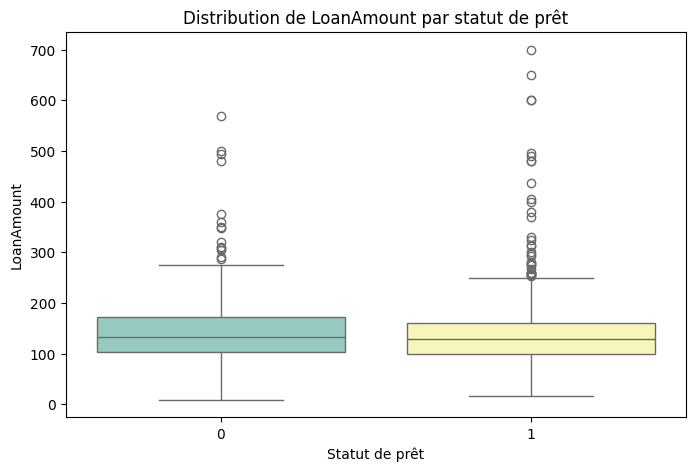

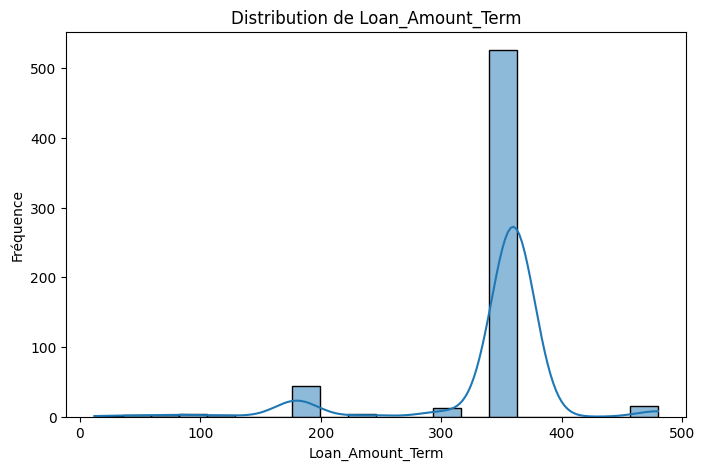

<ipython-input-25-933e36c17657>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=i, data=df, palette='Set3')


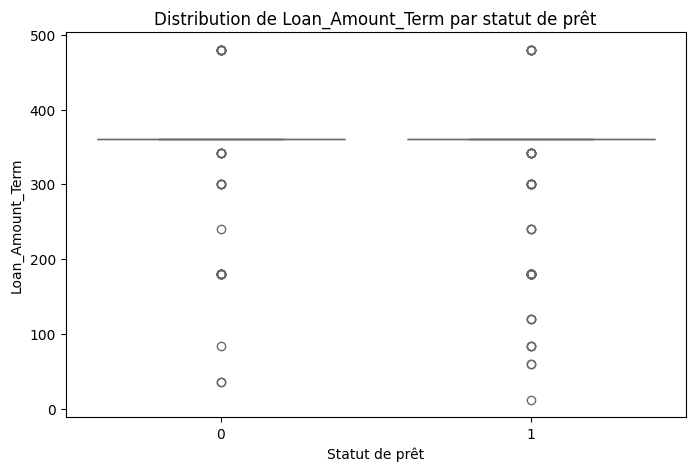

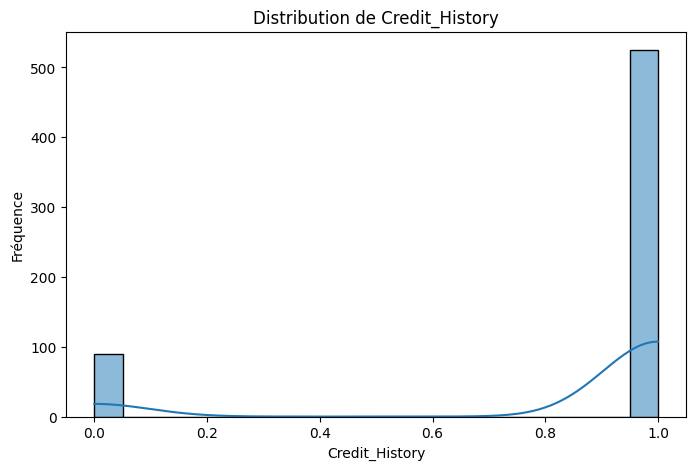

<ipython-input-25-933e36c17657>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=i, data=df, palette='Set3')


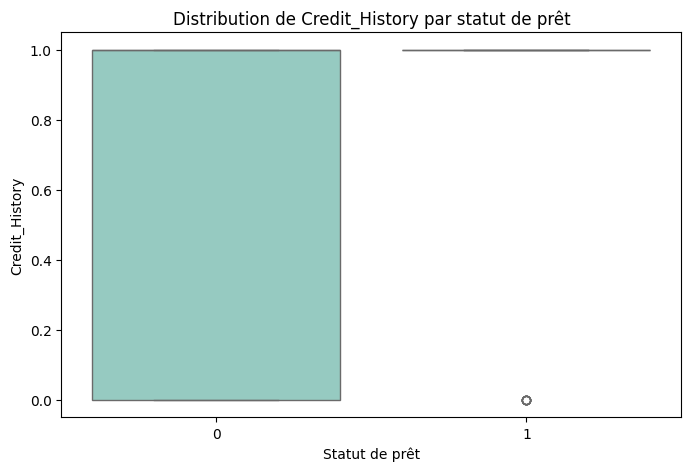

In [25]:
# Boucle sur les colonnes numériques
for i in num_data:
    # Création d'un histogramme avec estimation de densité de distribution (KDE)
    plt.figure(figsize=(8, 5))
    sns.histplot(df[i], bins=20, kde=True)
    plt.title(f'Distribution de {i}')
    plt.xlabel(i)
    plt.ylabel('Fréquence')
    plt.show()

    # Création d'une boîte à moustaches pour comparer la distribution par statut de prêt
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Loan_Status', y=i, data=df, palette='Set3')
    plt.title(f'Distribution de {i} par statut de prêt')
    plt.xlabel('Statut de prêt')
    plt.ylabel(i)
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


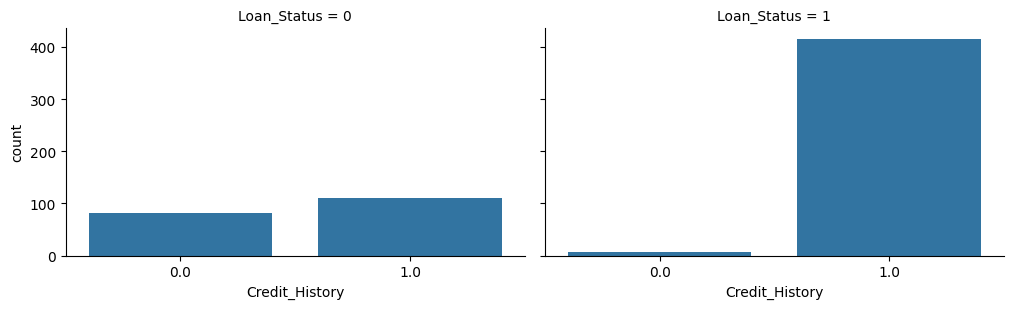

In [26]:
# Création de la grille de facettes
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)

# Tracé des countplots dans chaque facette
grid.map(sns.countplot, 'Credit_History')

# Affichage du graphique
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


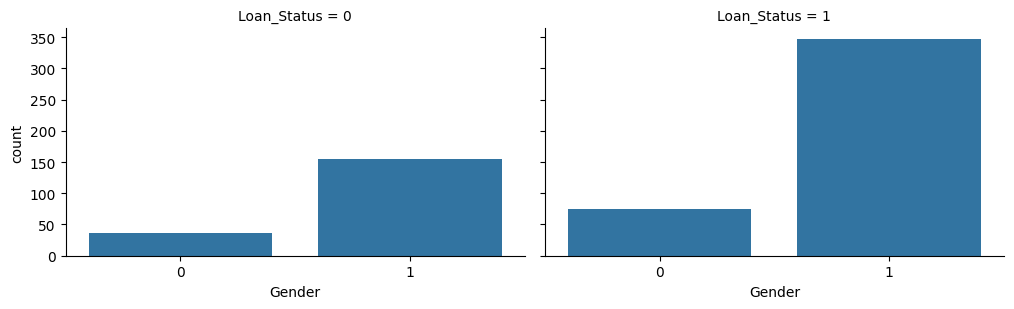

In [27]:
# Création de la grille de facettes
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)

# Tracé des countplots dans chaque facette
grid.map(sns.countplot, 'Gender')

# Affichage du graphique
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


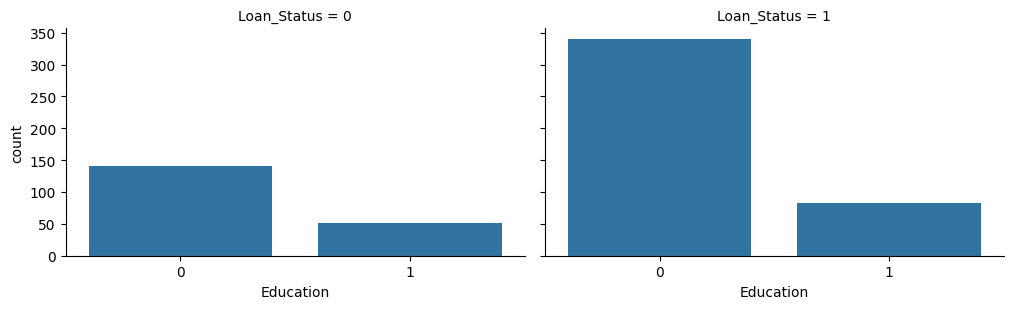

In [28]:
# Création de la grille de facettes
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)

# Tracé des countplots dans chaque facette
grid.map(sns.countplot, 'Education')

# Affichage du graphique
plt.show()

In [29]:
# Création de la matrice de corrélation
corr_matrix = df.corr()
# Affichage de la matrice de corrélation
print(corr_matrix)


                     Gender   Married  Dependents  Education  Self_Employed  \
Gender             1.000000  0.364569    0.172914   0.045364      -0.000525   
Married            0.364569  1.000000    0.334216   0.012304       0.004489   
Dependents         0.172914  0.334216    1.000000   0.055752       0.056798   
Education          0.045364  0.012304    0.055752   1.000000      -0.010383   
Self_Employed     -0.000525  0.004489    0.056798  -0.010383       1.000000   
Property_Area     -0.025752  0.004257   -0.000244  -0.065243      -0.030860   
ApplicantIncome    0.058809  0.051708    0.118202  -0.140760       0.127180   
CoapplicantIncome  0.082912  0.075948    0.030430  -0.062290      -0.016100   
LoanAmount         0.107930  0.147141    0.163106  -0.166998       0.115260   
Loan_Amount_Term  -0.073567 -0.100863   -0.101054  -0.077242      -0.033943   
Credit_History     0.009170  0.010938   -0.040160  -0.073658      -0.001550   
Loan_Status        0.017987  0.091478    0.010118  -

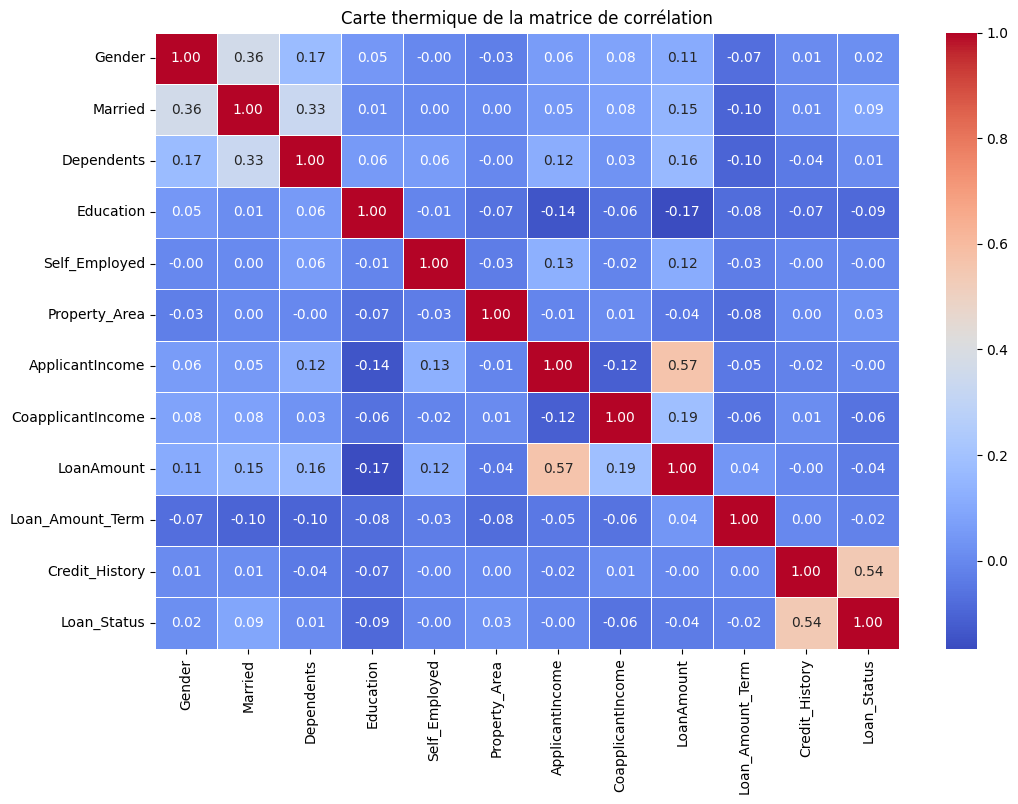

In [30]:
# Définition de la taille de la figure
plt.figure(figsize=(12,8))

# Tracé de la carte thermique avec annotations des valeurs de corrélation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Ajout du titre à la carte thermique
plt.title("Carte thermique de la matrice de corrélation")

# Affichage de la carte thermique
plt.show()

In [31]:
df.groupby('Loan_Status').median()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,1.0,1.0,0.0,0.0,0.0,1.0,3833.5,268.0,133.5,360.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,3812.5,1239.5,128.0,360.0,1.0


# **Preparation du modele**

In [32]:
# Créer un objet StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Diviser les données en ensembles d'entraînement et de test
for train, test in sss.split(x, y):
    x_train, x_test = x.iloc[train], x.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

print('x_train taille:', x_train.shape)
print('x_test taille:', x_test.shape)
print('y_train taille:', y_train.shape)
print('y_test taille:', y_test.shape)

x_train taille: (491, 11)
x_test taille: (123, 11)
y_train taille: (491,)
y_test taille: (123,)


In [33]:
# Définition des modèles à évaluer
models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42)
}

# Fonction pour calculer la précision et l'afficher ou la retourner
def accu(y_true, y_pred, retu=False):
    acc = accuracy_score(y_true, y_pred)
    if retu:
        return acc
    else:
        print(f'La précision du modèle est: {acc}')

# Fonction pour entraîner, tester et évaluer les modèles
def train_test_eval(models, x_train, y_train, x_test, y_test):
    for name, model in models.items():
        print(name,':')
        # Entraînement du modèle
        model.fit(x_train, y_train)
        # Évaluation du modèle sur les données de test
        accu(y_test, model.predict(x_test))
        print('-'*30)

# Appel de la fonction pour entraîner, tester et évaluer les modèles
train_test_eval(models, x_train, y_train, x_test, y_test)

LogisticRegression :
La précision du modèle est: 0.8617886178861789
------------------------------
KNeighborsClassifier :
La précision du modèle est: 0.6504065040650406
------------------------------
DecisionTreeClassifier :
La précision du modèle est: 0.8536585365853658
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
# Extraction d'un sous-ensemble de données avec certaines colonnes spécifiques
x_2 = x[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome','CoapplicantIncome','LoanAmount', 'Loan_Amount_Term','Credit_History' ]]

In [35]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Diviser les données en ensembles d'entraînement et de test
for train, test in sss.split(x_2, y):
    x_train, x_test = x_2.iloc[train], x_2.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

print('x_train taille:', x_train.shape)
print('x_test taille:', x_test.shape)
print('y_train taille:', y_train.shape)
print('y_test taille:', y_test.shape)

x_train taille: (491, 10)
x_test taille: (123, 10)
y_train taille: (491,)
y_test taille: (123,)


In [36]:
train_test_eval(models, x_train, y_train, x_test, y_test)

LogisticRegression :
La précision du modèle est: 0.8617886178861789
------------------------------
KNeighborsClassifier :
La précision du modèle est: 0.6504065040650406
------------------------------
DecisionTreeClassifier :
La précision du modèle est: 0.8536585365853658
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
Classifier= LogisticRegression()
Classifier.fit(x_2,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# **Deploiement du modele**

In [38]:
pickle.dump(Classifier,open('modelkv.pkl','wb'))

# **Conclusion **